## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 11.03.2025
- remaining points: last lab session before or on Tuesday, 18.03.2025

**Points:** Aim to get 8 out of 14 possible points

## Submission instructions
The class is held on-site in lab rooms. Please prepare you notebook on your computer or anywhere in the cloud (try using DeepNote or Google Colab).

Make sure you know all the questions and answers, and that the notebook contains results; before presentation do `Runtime -> Restart and run all`
![Picture title](image-20220302-183151.png)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.


# Task description

## TLDR
Implement and train a neural network using pure `torch`.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
$$
\begin{aligned}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2)  & \qquad\text{Output of the network}
\end{aligned}
$$

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data flowing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_2\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with such calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

Analytically derive the form of the following gradients:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

# Solutions and starter code

In [2]:
import matplotlib.pyplot as plt
import torch

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

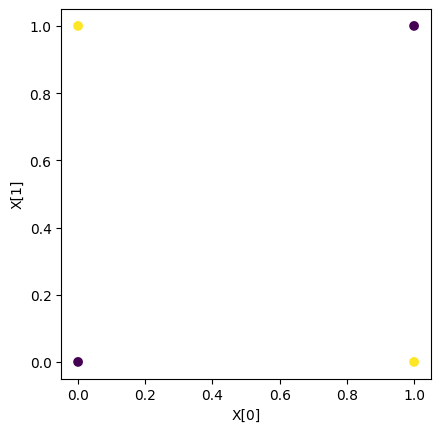

In [3]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=torch.float64)
# Y is a matrix of N numners - answers
Y = torch.tensor([[0], [1], [1], [0],], dtype=torch.float64)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [4]:
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


class SmallNet:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * torch.tensor(0.5)
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * torch.tensor(0.5)
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * torch.tensor(0.5)
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * torch.tensor(0.5)

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss =  -(Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2)) # TODO cross-entropy loss
            # loss2 = torch.nn.BCELoss()(O2, Y)
            # print(loss, loss2)
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * O1 * (1 - O1)
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss
    
    def predict(self, X):
        return self.forward(X, do_backward=False)[0]

In [5]:
# TODO Problem 1:
# Set the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=torch.float64)
net.W1 = torch.tensor([[6, 6], [-5, -5]], dtype=torch.float64)
net.b1 = torch.tensor([-2.5, 7.5], dtype=torch.float64)
net.W2 = torch.tensor([[11, 11]], dtype=torch.float64)
net.b2 = torch.tensor([-16], dtype=torch.float64)

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.015192555669562909
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.9921792667053017
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9921792667053017
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.015271414194180143


## Problem 2

In [6]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = torch.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i].item()
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert torch.allclose(grad, orig_grad)
    return grad, orig_grad

In [7]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=torch.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [8]:
net = SmallNet(2, 10, dtype=torch.float64)

alpha = 0.01  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(net, param_name + "_grad")

after 0 steps 	loss=0.9154525699107978
after 5000 steps 	loss=0.6875235652605249
after 10000 steps 	loss=0.6670146742490206
after 15000 steps 	loss=0.59739627467929
after 20000 steps 	loss=0.4452736932321376
after 25000 steps 	loss=0.2752860236166601
after 30000 steps 	loss=0.16109744537016157
after 35000 steps 	loss=0.10122231409791499
after 40000 steps 	loss=0.06963917318682765
after 45000 steps 	loss=0.05149047140309522
after 50000 steps 	loss=0.040136479440810835
after 55000 steps 	loss=0.03252521192783699
after 60000 steps 	loss=0.027138865948030208
after 65000 steps 	loss=0.023161047823723687
after 70000 steps 	loss=0.02012178236061163
after 75000 steps 	loss=0.01773466778295693
after 80000 steps 	loss=0.015816671046175474
after 85000 steps 	loss=0.014246052529017735
after 90000 steps 	loss=0.012939052778865657
after 95000 steps 	loss=0.011836350978688136


In [9]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet(tensor([0., 0.], dtype=torch.float64)) = 0.010624872748666444
XORnet(tensor([0., 1.], dtype=torch.float64)) = 0.987626617898475
XORnet(tensor([1., 0.], dtype=torch.float64)) = 0.9897808813460229
XORnet(tensor([1., 1.], dtype=torch.float64)) = 0.010123909506000167


In [10]:
# TODO:
# Generate data for a 3D XOR task
# Then estimate the success rate of training the network with diferent
# hidden sizes.

X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1,1,1],], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [1], [0], [0], [0], [1],], dtype=torch.float64)

success_rate = 0
alpha = 0.01
for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a few trainings and record the fraction of successful ones
    net = SmallNet(3, hidden_dim, dtype=torch.float64)
    for i in range(100000):
        _, loss = net.forward(X3, Y3, do_backward=True)
        for param_name in ["W1", "b1", "W2", "b2"]:
            param = getattr(net, param_name)
            param[:] = param - alpha * getattr(net, param_name + "_grad")
    predictions = net.predict(X3)
    success_rate += (predictions.round() == Y3).all(dim=1).float().mean()
    # print(success_rate)
    print(f"hidden_dim={hidden_dim} \tloss={loss}")
print("Success rate:", success_rate / 5)
        

hidden_dim=2 	loss=0.3996021087261302
hidden_dim=3 	loss=0.03683514777809006
hidden_dim=5 	loss=0.6845526653974243
hidden_dim=10 	loss=0.03296796298811212
hidden_dim=20 	loss=0.014528663347933776
Success rate: tensor(0.8750)


## Problem 4


In [11]:
def relu(x):
    return torch.maximum(x, torch.tensor(0.0, dtype=x.dtype))


class SmallNetReLu:
    def __init__(self, in_features: int, num_hidden: int, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden,), dtype=dtype)
        self.W2 = torch.zeros((1, num_hidden), dtype=dtype)
        self.b2 = torch.zeros((1,), dtype=dtype)
        self.init_params()
        # print(self.W1, self.b1, self.W2, self.b2)

    def init_params(self):
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * torch.tensor(0.5)
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * torch.tensor(0.5)
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * torch.tensor(0.5)
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * torch.tensor(0.5)

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.T + self.b1
        O1 = relu(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = sigmoid(A2)

        if Y is not None:
            loss =  -(Y * torch.log(O2) + (1 - Y) * torch.log(1 - O2)) 
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A2_grad = (O2 - Y) / X.shape[0]
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * (A1 > 0).float()
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O2, loss
    
    def train(self, X, Y, alpha=0.01, steps=100000):
        for i in range(steps):
            _, loss = self.forward(X, Y, do_backward=True)
            if (i % 5000) == 0:
                print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(self, param_name)
                param[:] = param - alpha * getattr(self, param_name + "_grad")
                
    def predict(self, X):
        return self.forward(X, do_backward=False)[0]

In [12]:
X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [1,1,1],], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [1], [0], [0], [0], [1],], dtype=torch.float64)

netReLu = SmallNetReLu(3, 18, dtype=torch.float64)
netReLu.train(X3, Y3, alpha=0.01)
preds = netReLu.predict(X3)
for x, p in zip(X3, preds):
    print(f"XORnet({x}) = {p[0]}")


after 0 steps 	loss=0.8847681506730749
after 5000 steps 	loss=0.2552081400992924
after 10000 steps 	loss=0.0863500815808928
after 15000 steps 	loss=0.03883276663817466
after 20000 steps 	loss=0.02265241903478142
after 25000 steps 	loss=0.015212809654536589
after 30000 steps 	loss=0.011114684671690885
after 35000 steps 	loss=0.008668715828402868
after 40000 steps 	loss=0.00704332454740789
after 45000 steps 	loss=0.005889743897517154
after 50000 steps 	loss=0.005033959102377126
after 55000 steps 	loss=0.004377932223025541
after 60000 steps 	loss=0.0038615050398705594
after 65000 steps 	loss=0.0034454867996257595
after 70000 steps 	loss=0.0031038096982231654
after 75000 steps 	loss=0.002818974738179883
after 80000 steps 	loss=0.0025781172699983453
after 85000 steps 	loss=0.002372262205907722
after 90000 steps 	loss=0.0021946683687900865
after 95000 steps 	loss=0.0020399589451292324
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 0.0014233594298346806
XORnet(tensor([0., 0., 1.], dtype=

## Problem 5

In [13]:
class SmallNetTwoLayers:
    def __init__(self, in_features: int, num_hidden1: int, num_hidden2: int, dtype=torch.float32):
        self.W1 = torch.zeros((num_hidden1, in_features), dtype=dtype)
        self.b1 = torch.zeros((num_hidden1,), dtype=dtype)
        self.W2 = torch.zeros((num_hidden2, num_hidden1), dtype=dtype)
        self.b2 = torch.zeros((num_hidden2,), dtype=dtype)
        self.W3 = torch.zeros((1, num_hidden2), dtype=dtype)
        self.b3 = torch.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        self.W1 = torch.randn(self.W1.shape, dtype=self.W1.dtype) * torch.tensor(0.5, dtype=self.W1.dtype)
        self.b1 = torch.randn(self.b1.shape, dtype=self.b1.dtype) * torch.tensor(0.5, dtype=self.b1.dtype)
        self.W2 = torch.randn(self.W2.shape, dtype=self.W2.dtype) * torch.tensor(0.5, dtype=self.W2.dtype)
        self.b2 = torch.randn(self.b2.shape, dtype=self.b2.dtype) * torch.tensor(0.5, dtype=self.b2.dtype)
        self.W3 = torch.randn(self.W3.shape, dtype=self.W3.dtype) * torch.tensor(0.5, dtype=self.W3.dtype)
        self.b3 = torch.randn(self.b3.shape, dtype=self.b3.dtype) * torch.tensor(0.5, dtype=self.b3.dtype)

    def forward(self, X, Y=None, do_backward=False):
        A1 = X @ self.W1.T + self.b1
        O1 = relu(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = relu(A2)
        A3 = O2 @ self.W3.T + self.b3
        O3 = sigmoid(A3)

        if Y is not None:
            loss =  -(Y * torch.log(O3) + (1 - Y) * torch.log(1 - O3)) 
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A3_grad = (O3 - Y) / X.shape[0]
            self.b3_grad = A3_grad.sum(0)
            self.W3_grad = A3_grad.T @ O2
            O2_grad = A3_grad @ self.W3
            A2_grad = O2_grad * (A2 > 0).float()
            self.b2_grad = A2_grad.sum(0)
            self.W2_grad = A2_grad.T @ O1
            O1_grad = A2_grad @ self.W2
            A1_grad = O1_grad * (A1 > 0).float()
            self.b1_grad = A1_grad.sum(0)
            self.W1_grad = A1_grad.T @ X

        return O3, loss
    
    def train(self, X, Y, alpha=0.01, steps=100000):
        for i in range(steps):
            _, loss = self.forward(X, Y, do_backward=True)
            if (i % 5000) == 0:
                print(f"after {i} steps \tloss={loss}")
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(self, param_name)
                param[:] = param[:] - alpha * getattr(self, param_name + "_grad")
                
    def predict(self, X):
        return self.forward(X, do_backward=False)[0]

In [14]:
X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

net2Layers = SmallNetTwoLayers(3, 10, 10, dtype=torch.float64)
net2Layers.train(X3, Y3, alpha=0.1)
preds = net2Layers.predict(X3)
for x, p in zip(X3, preds):
    print(f"XORnet({x}) = {p[0]}")

after 0 steps 	loss=0.8634970858458648
after 5000 steps 	loss=0.00045133993910231944
after 10000 steps 	loss=0.00018208845651551897
after 15000 steps 	loss=0.00010948035472154228
after 20000 steps 	loss=7.684731432155761e-05
after 25000 steps 	loss=5.859347924692254e-05
after 30000 steps 	loss=4.703515267685366e-05
after 35000 steps 	loss=3.911042282253968e-05
after 40000 steps 	loss=3.335776988014191e-05
after 45000 steps 	loss=2.900736376377827e-05
after 50000 steps 	loss=2.561100733740205e-05
after 55000 steps 	loss=2.288916646809169e-05
after 60000 steps 	loss=2.0662930328494573e-05
after 65000 steps 	loss=1.8811707942093274e-05
after 70000 steps 	loss=1.7248293532117762e-05
after 75000 steps 	loss=1.5912200092014812e-05
after 80000 steps 	loss=1.4758259707658435e-05
after 85000 steps 	loss=1.3752049890349152e-05
after 90000 steps 	loss=1.2867503351543237e-05
after 95000 steps 	loss=1.208418457702033e-05
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 8.379871583660614e-06
XORn

## Problem 6

In [18]:
class SmallNetMultLayers:
    def __init__(self, in_features: int, num_layers: int, num_neurons: int, relu_actv=False, dtype=torch.float32):
        self.Ws = [torch.zeros((num_neurons, in_features), dtype=dtype)]
        self.bs = [torch.zeros((num_neurons,), dtype=dtype)]
        for _ in range(num_layers - 1):
            self.Ws.append(torch.zeros((num_neurons, num_neurons), dtype=dtype))
            self.bs.append(torch.zeros((num_neurons,), dtype=dtype))
        self.Ws.append(torch.zeros((1, num_neurons), dtype=dtype))
        self.bs.append(torch.zeros((1,), dtype=dtype))
        self.W_grad = [torch.zeros_like(w) for w in self.Ws]
        self.b_grad = [torch.zeros_like(b) for b in self.bs]
        self.relu_actv = relu_actv
        self.init_params()

    def init_params(self):
        for i in range(len(self.Ws)):
            self.Ws[i] = torch.randn(self.Ws[i].shape, dtype=self.Ws[i].dtype) * torch.tensor(0.5, dtype=self.Ws[i].dtype)
            self.bs[i] = torch.randn(self.bs[i].shape, dtype=self.bs[i].dtype) * torch.tensor(0.5, dtype=self.bs[i].dtype)
        
    def forward(self, X, Y=None, do_backward=False):
        if self.relu_actv:
            actv = relu
        else:
            actv = sigmoid
        As = [X @ self.Ws[0].T + self.bs[0]]
        Os = [actv(As[0])]
        for i in range(1, len(self.Ws)-1):
            temp = Os[-1] @ self.Ws[i].T + self.bs[i]
            As.append(temp)
            Os.append(actv(temp))
        last = Os[-1] @ self.Ws[-1].T + self.bs[-1]
        As.append(last)
        Os.append(sigmoid(last))


        if Y is not None:
            loss =  -(Y * torch.log(Os[-1]) + (1 - Y) * torch.log(1 - Os[-1])) 
            loss = loss.sum() / X.shape[0]
        else:
            loss = torch.nan

        if do_backward:
            A_grad = (Os[-1] - Y) / X.shape[0]
            self.b_grad[-1] = A_grad.sum(0)
            self.W_grad[-1] = A_grad.T @ Os[-2]

            for i in range(len(self.Ws) - 2, -1, -1):
                O_grad = A_grad @ self.Ws[i+1]
                if self.relu_actv:
                    A_grad = O_grad * (As[i] > 0).float()
                else:
                    A_grad = O_grad * Os[i] * (1 - Os[i])
                self.b_grad[i] = A_grad.sum(0)
                self.W_grad[i] = A_grad.T @ Os[i - 1] if i != 0 else A_grad.T @ X 
            
        return Os[-1], loss
    
    def train(self, X, Y, alpha=0.01, steps=100000):
        for i in range(steps):
            _, loss = self.forward(X, Y, do_backward=True)
            if (i % 5000) == 0:
                print(f"after {i} steps \tloss={loss}")
            for param in range(len(self.Ws)):
                self.Ws[param] -= alpha * self.W_grad[param]
                self.bs[param] -= alpha * self.b_grad[param]
                
    def predict(self, X):
        return self.forward(X, do_backward=False)[0]

In [19]:
X3 = torch.tensor([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=torch.float64)
Y3 = torch.tensor([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=torch.float64)

customNet = SmallNetMultLayers(3, 2, 10, relu_actv=True, dtype=torch.float64)
# early_result = customNet.forward(X3, Y3)
# print(early_result)
customNet.train(X3, Y3, alpha=0.1)
preds = customNet.predict(X3)
for x, p in zip(X3, preds):
    print(f"XORnet({x}) = {p[0]}")

after 0 steps 	loss=1.0115234475878396
after 5000 steps 	loss=0.0005834841855132239
after 10000 steps 	loss=0.00022512339224902718
after 15000 steps 	loss=0.00013301601810690054
after 20000 steps 	loss=9.251790688298262e-05
after 25000 steps 	loss=7.01246194899951e-05
after 30000 steps 	loss=5.6052298911853885e-05
after 35000 steps 	loss=4.6453853942964474e-05
after 40000 steps 	loss=3.952217784564057e-05
after 45000 steps 	loss=3.429896190954314e-05
after 50000 steps 	loss=3.023004970514902e-05
after 55000 steps 	loss=2.6977444750831218e-05
after 60000 steps 	loss=2.4323231504932904e-05
after 65000 steps 	loss=2.2117922264500377e-05
after 70000 steps 	loss=2.0260039106912694e-05
after 75000 steps 	loss=1.8673564308021066e-05
after 80000 steps 	loss=1.7304689882825348e-05
after 85000 steps 	loss=1.6112334934039797e-05
after 90000 steps 	loss=1.506531953557933e-05
after 95000 steps 	loss=1.4139048608891795e-05
XORnet(tensor([0., 0., 0.], dtype=torch.float64)) = 1.236167383503557e-05
XOR

## Problem 7

Consider the following function $\boldsymbol f: \mathbb R^n \to \mathbb R^k$:
$$ \hat{\boldsymbol y} := \boldsymbol f(\boldsymbol x\,;\,\,W, \boldsymbol b) = \mathrm{softmax}(\boldsymbol z) \qquad (\boldsymbol x \in \mathbb R^{n}, \, W \in\mathbb R^{k\times n}, \, \boldsymbol b \in \mathbb R^k), $$
where $$ \boldsymbol z = W  \boldsymbol x + \boldsymbol b $$
and $W, \boldsymbol b$ are the parameters.

$$ \mathrm{softmax}(\boldsymbol z) = \frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}\quad

\text{where} \quad\boldsymbol z = (z_1;...;z_K) $$

a)
Since the function maps a vector and a specific index $i$ to a real value, the derivative needs to take the index into account:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} = \frac{\partial \hat{\boldsymbol y_i}}{\boldsymbol z_j} $$

Let $S=\sum_{j=1}^{K}e^{z_j}$ for easier calculations.

Now, first case $i=j$:

$$ \frac{\partial \hat{\boldsymbol y_i}}{\boldsymbol z_i} = \frac{e^{z_i}(S)-e^{z_i}e^{z_i}}{S^2} =  \hat{\boldsymbol y_i} - \hat{\boldsymbol y_i}^2$$

Second, $i\neq j$:

$$ \frac{\partial \hat{\boldsymbol y_i}}{\boldsymbol z_j} = \frac{0 * (S)-e^{z_i}e^{z_j}}{S^2} =  -\hat{\boldsymbol y_i} \hat{\boldsymbol y_j}$$

Using Kronecker's delta:

$$ \frac{\partial \hat{\boldsymbol y_i}}{\boldsymbol z_j} = \hat{\boldsymbol y_i} (\delta_{ij} - \hat{\boldsymbol y_j})$$

b)
$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \ldots $$

Let's first apply the chain rule:
$$ \frac{\partial \hat{\boldsymbol y}}{W_{ij}} = \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z} * \frac{\partial {\boldsymbol z}}{W_{ij}} $$

We already calculated the first derivative and the second $\frac{\partial {\boldsymbol z}}{W_{ij}}=x$, this gives us:
$$\frac{\partial \hat{\boldsymbol y}}{W_{ij}}=\hat{\boldsymbol y_i} (\delta_{ij} - \hat{\boldsymbol y_j}) * x$$


c)

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \ldots $$

Similary to $b)$:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \frac{\partial \hat{\boldsymbol y}}{\boldsymbol z_i} * \frac{\partial {\boldsymbol z_i}}{\boldsymbol b} $$

Then $\frac{\partial {\boldsymbol z_i}}{\boldsymbol b}$ easly computes to $1$, giving:

$$ \frac{\partial \hat{\boldsymbol y}}{\boldsymbol b} = \hat{\boldsymbol y_i} (\delta_{ij} - \hat{\boldsymbol y_j})$$
